In [1]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)), # for the crop above, or even generally?
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(), # scales between 0-1; it justs put it in a bucket unlike normalize where you are centering and shifting
    transforms.Normalize((0.1307,), (0.3081,)), # mean and std of complete dataset, also it is a tuple of means across each channel; follows a normal distribution
    ])

# # Test data transformations
# test_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1407,), (0.4081,))
#     ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
# test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [7]:
batch_size = 512

# kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

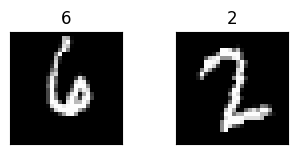

In [8]:
from utils import return_dataset_images

return_dataset_images(train_loader, 2)

In [9]:
from model import Net, model_summary, model_train, model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 2

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    model_train(model, device, train_loader, optimizer, criterion)
    model_test(model, device, test_loader, criterion)
    scheduler.step() # it checks if learning rate should reduce based on the criterion we mentioned when defining scheduler. In this case, after 15 epochs it reduces

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=2.2857 Batch_id=117 Accuracy=15.94: 100%|██████████| 118/118 [00:28<00:00,  4.08it/s]


Test set: Average loss: 2.2876, Accuracy: 2124/10000 (21.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=2.2340 Batch_id=117 Accuracy=22.29: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 2.2241, Accuracy: 2405/10000 (24.05%)

Adjusting learning rate of group 0 to 1.0000e-03.


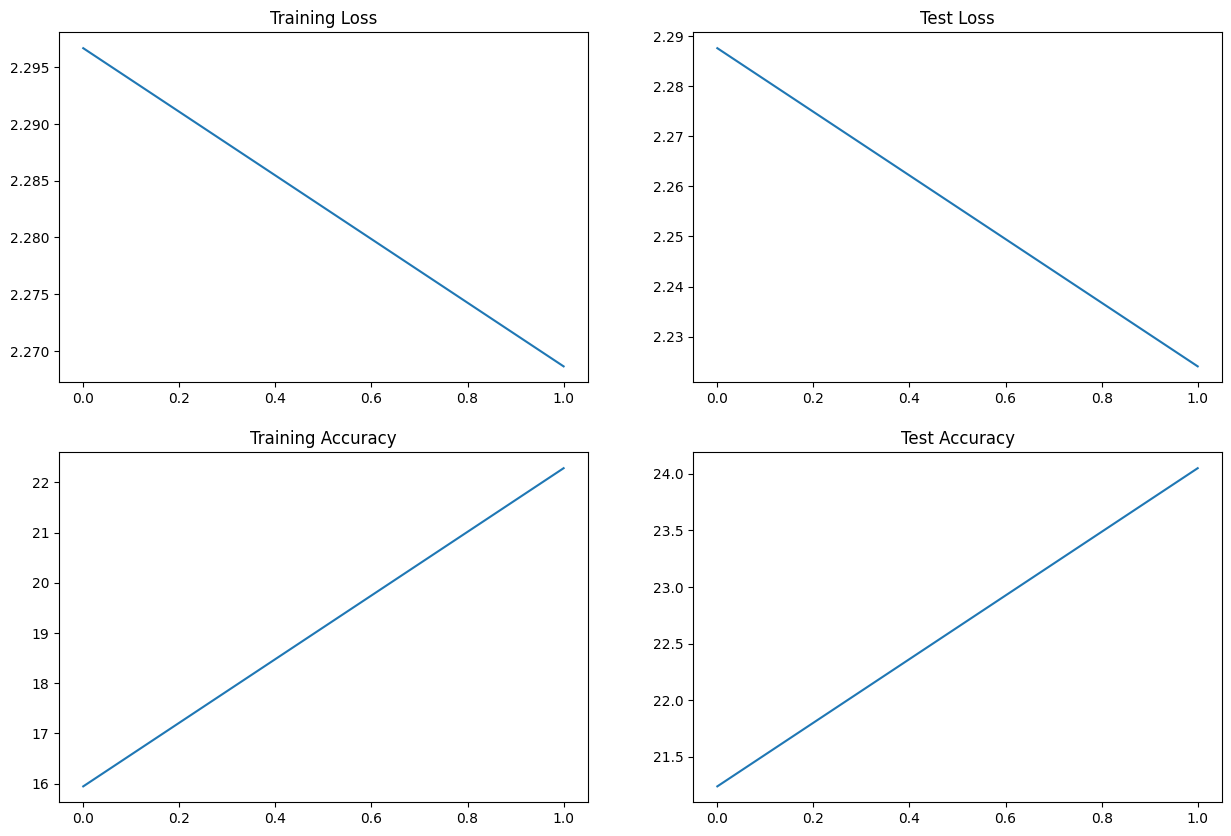

In [11]:
from model import draw_graphs

draw_graphs()